# Filter shapefile for one province

## Preliminaries

Import Dependencies

In [1]:
import geopandas as gpd
import pandas as pd
import pyproj
import os

# for helper functions
import sys
sys.path.append('../06_helper_functions')
import helpers


Set Province

In [2]:
province = "Catanduanes"

Load File

<Axes: >

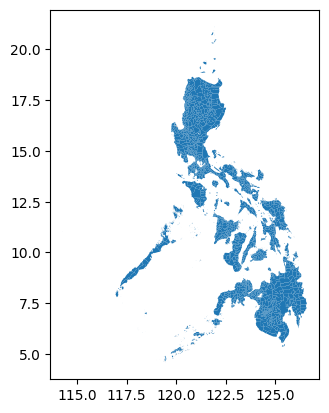

In [6]:
sf = gpd.read_file("../01_data/00_raw/01_shapefiles/PH_Adm3_MuniCities.shp/PH_Adm3_MuniCities.shp.shp")
sf.to_crs(pyproj.CRS.from_epsg(4326), inplace=True)
sf.plot()

In [4]:
sf.head(10)

,adm1_psgc,adm2_psgc,adm3_psgc,adm3_en,geo_level,len_crs,area_crs,len_km,area_km2,geometry
0,100000000,102800000,102801000,Adams,Mun,45997,111184551,45,111.0,"POLYGON ((120.96915 18.51012, 120.95867 18.463..."
1,100000000,102800000,102802000,Bacarra,Mun,33313,55346073,33,55.0,"POLYGON ((120.66821 18.28705, 120.66441 18.282..."
2,100000000,102800000,102803000,Badoc,Mun,64985,80758428,64,80.0,"POLYGON ((120.47814 17.97717, 120.47816 17.977..."
3,100000000,102800000,102804000,Bangui,Mun,52068,115127442,52,115.0,"POLYGON ((120.81318 18.53457, 120.81358 18.533..."
4,100000000,102800000,102805000,City of Batac,City,66661,158252391,66,158.0,"POLYGON ((120.61242 18.10947, 120.612 18.10679..."
5,100000000,102800000,102806000,Burgos,Mun,54828,137203257,54,137.0,"POLYGON ((120.6707 18.53161, 120.67175 18.5271..."
6,100000000,102800000,102807000,Carasi,Mun,56958,173134875,56,173.0,"POLYGON ((120.92312 18.30378, 120.91667 18.284..."
7,100000000,102800000,102808000,Currimao,Mun,41115,33463719,41,33.0,"POLYGON ((120.48603 18.06715, 120.48652 18.067..."
8,100000000,102800000,102809000,Dingras,Mun,55309,108434465,55,108.0,"POLYGON ((120.73328 18.13173, 120.73348 18.131..."
9,100000000,102800000,102810000,Dumalneg,Mun,40939,66780135,40,66.0,"POLYGON ((120.88929 18.47631, 120.88044 18.454..."


## Filter Province

Get PSGC Codes for Selected Province

In [3]:
prov_psgc = helpers.get_prov_code(province)

prov_psgc

502000000

Get PSGC Codes for Municipalities in Province

In [4]:
mun_pgsc = helpers.get_mun_codes(int(prov_psgc))

mun_pgsc.values

array([502001000, 502002000, 502003000, 502004000, 502005000, 502006000,
       502007000, 502008000, 502009000, 502010000, 502011000], dtype=int64)

Get all Rows that match the PSGC Code

In [7]:
sf_filtered = sf[sf['adm3_psgc'].isin(mun_pgsc)]

sf_filtered.head(10)

,adm1_psgc,adm2_psgc,adm3_psgc,adm3_en,geo_level,len_crs,area_crs,len_km,area_km2,geometry
557,500000000,502000000,502001000,Bagamanoc,Mun,69510,68263960,69,68.0,"MULTIPOLYGON (((124.26683 14.02121, 124.26778 ..."
558,500000000,502000000,502002000,Baras,Mun,73441,71126568,73,71.0,"MULTIPOLYGON (((124.39639 13.73633, 124.39639 ..."
559,500000000,502000000,502003000,Bato,Mun,57344,51954499,57,51.0,"MULTIPOLYGON (((124.34623 13.62613, 124.34621 ..."
560,500000000,502000000,502004000,Caramoran,Mun,120928,281463181,120,281.0,"MULTIPOLYGON (((124.0474 14.01378, 124.04737 1..."
561,500000000,502000000,502005000,Gigmoto,Mun,80885,106033936,80,106.0,"MULTIPOLYGON (((124.39639 13.73633, 124.39363 ..."
562,500000000,502000000,502006000,Pandan,Mun,72753,106047281,72,106.0,"MULTIPOLYGON (((124.26327 14.01531, 124.25632 ..."
563,500000000,502000000,502007000,Panganiban,Mun,74678,50585420,74,50.0,"MULTIPOLYGON (((124.34591 13.96378, 124.34591 ..."
564,500000000,502000000,502008000,San Andres,Mun,85557,179142572,85,179.0,"POLYGON ((124.16783 13.72802, 124.16796 13.719..."
565,500000000,502000000,502009000,San Miguel,Mun,59751,242829264,59,242.0,"POLYGON ((124.28404 13.78363, 124.27618 13.777..."
566,500000000,502000000,502010000,Viga,Mun,90041,168222453,90,168.0,"MULTIPOLYGON (((124.4041 13.84219, 124.39841 1..."


<Axes: >

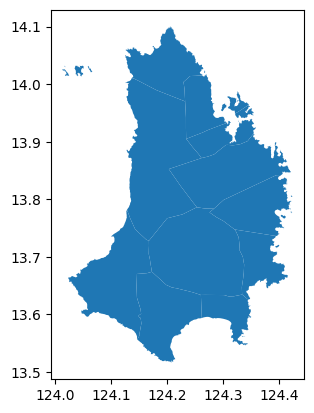

In [8]:
sf_filtered.plot()

Export to File

In [ ]:
os.mkdir(f"../01_data/01_processed/02_filtered_shapefiles/{province}")

sf_filtered.to_file(f"../01_data/01_processed/02_filtered_shapefiles/{province}/{province}.shp")